# Deep learning project

## Kunskapskontroll 2

### Detecting emotion on images or video of human faces.

To start with we use the following dataset from Kaggle:

'Face expression recognition dataset'

LINK:
https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

Supplemental dataset from :
    
http://mmlab.ie.cuhk.edu.hk/projects/socialrelation/index.html

The project is based on the example from this Github: https://github.com/akmadan/Emotion_Detection_CNN
 and the Youtube video: https://www.youtube.com/watch?v=Bb4Wvl57LIk

## Importing libraries

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import itertools
from collections import defaultdict

# Importing Deep Learning Libraries
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array,  load_img
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential




In [12]:
# size of the images
picture_size = 48

In [13]:
# path to the image folder
folder_path = "content/"

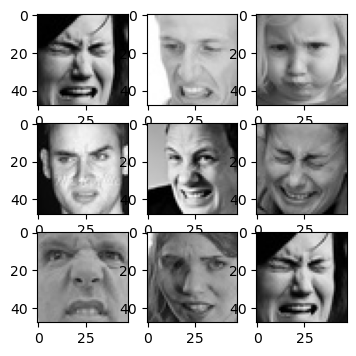

In [14]:
expression = 'disgust'

plt.figure(figsize= (4,4))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## Making Training and Validation Data

In [15]:
batch_size  = 128

### We need a smaller training set (so we dont wait forever)
It needs to be stratified.

In [19]:

def create_stratified_dataset(directory, batch_size, target_size, limit_per_class=None):
    # Function to preprocess an image
    def preprocess_image(image_path):
        img = load_img(image_path, color_mode='grayscale', target_size=target_size)
        img_array = img_to_array(img)
        return img_array / 255.0  # Normalize pixel values to be between 0 and 1

    images = []
    labels = []
    class_counts = defaultdict(int)
    class_to_label = {}  # Mapping of class names to numerical labels
    label_counter = 0
    
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        class_to_label[class_name] = label_counter
        label_counter += 1
        
        class_limit = limit_per_class if limit_per_class else float('inf')
        class_count = 0
        
        for image_name in os.listdir(class_path):
            if class_count >= class_limit:
                break
            
            image_path = os.path.join(class_path, image_name)
            images.append(preprocess_image(image_path))
            labels.append(tf.keras.utils.to_categorical(class_to_label[class_name], num_classes=NUM_CLASSES))
            
            class_count += 1
            class_counts[class_name] += 1
    
    # Determine the minimum class count for stratification
    min_class_count = min(class_counts.values())
    min_limit = min(min_class_count, limit_per_class) if limit_per_class else min_class_count
    
    # Filter dataset to ensure stratified sampling
    filtered_images = []
    filtered_labels = []
    for i in range(len(images)):
        class_name = str(np.argmax(labels[i]))
        if class_counts[class_name] > min_limit:
            filtered_images.append(images[i])
            filtered_labels.append(labels[i])
            class_counts[class_name] -= 1
    
    images = np.array(filtered_images)
    labels = np.array(filtered_labels)
    
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(buffer_size=len(images))
    dataset = dataset.batch(batch_size)
    
    return dataset


In [20]:
import glob

def count_images_per_expression(folder_path, expressions):
    expression_counts = {}
    
    for expression in expressions:
        expression_counts[expression] = 0
        
        # Count the number of images for the current expression
        expression_dir = folder_path + "train/" + expression + "/"
        image_files = glob.glob(expression_dir + "*.jpg")
        expression_counts[expression] = min(9, len(image_files))  # Count up to 9 images per expression
            
    return expression_counts

# Update the directory paths to ones you have access to
folder_path = "content/"
expressions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Count the number of images per expression
expression_counts = count_images_per_expression(folder_path, expressions)

# Display the counts
for expression, count in expression_counts.items():
    print(f"Number of images for {expression}: {count}")

# Use the minimum count per expression as the limit
min_expression_count = min(expression_counts.values())

# Set the limit per class for training and validation
limit_per_expression_train = min_expression_count
limit_per_expression_validation = min_expression_count

# Create stratified datasets
stratified_train_dataset = create_stratified_dataset(folder_path + "train", batch_size, picture_size, limit_per_expression_train)
stratified_validation_dataset = create_stratified_dataset(folder_path + "test", batch_size, picture_size, limit_per_expression_validation)




Number of images for Angry: 9
Number of images for Disgust: 9
Number of images for Fear: 9
Number of images for Happy: 9
Number of images for Neutral: 9
Number of images for Sad: 9
Number of images for Surprise: 9


NameError: name 'class_path' is not defined